# Random graph experiments I: Color

## Graph and data generation module ##

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "1" # export OPENBLAS_NUM_THREADS=4 
os.environ["VECLIB_MAXIMUM_THREADS"] = "1" # export VECLIB_MAXIMUM_THREADS=4

In [2]:
import sys, time, random
import numpy as np
from model.MNLogit_bfgs_torch import MNLogit

In [5]:
filenames = sorted([name for name in os.listdir('features-fitness-big') if len(name.split('&')) > 3])

In [6]:
len(filenames)

240

In [7]:
def fit(kwargs, num_threads=1):
  dataset_id = kwargs['id']
  sampling = kwargs['sampling']
  c = sampling[0]
  dat = np.load('features-fitness-big/' + filenames[dataset_id])
  results = {'results':[]}
  results['dataset'] = {s.split('=')[0]:s.split('=')[1] for s in filenames[dataset_id].replace('.npz','').split('&')}
  results['dataset']['sampling'] = sampling
  
  for i in range(1):
    m = MNLogit(num_threads)
    m.data(dat['Xs_'+c][i], dat['ys_'+c][i]-dat['ys_'+c][i]+24, sws=dat['sws_'+c][i])
    m.fit(max_num_iter=500, clip=1.0, clip_norm_ord=2)
    info = m.get_model_info()
    info['se'] = list(info['se'])
    info['weights'] = list(info['weights'])
    results['results'].append(info)
    
  print("Dataset {},{} done".format(dataset_id,sampling))
  return results

In [8]:
from multiprocessing import Pool
from itertools import product
args = [{'id':i, 'sampling':s} for i,s in product(range(len(filenames)), ['uniform','stratified','importance'])]
with Pool(49) as p:
  x = p.map(fit, args)

Dataset 24,uniform done
Dataset 8,uniform done
Dataset 50,importance done
Dataset 56,uniform done
Dataset 53,stratified done
Dataset 34,importance done
Dataset 20,uniform done
Dataset 32,uniform done
Dataset 4,uniform done
Dataset 37,stratified done
Dataset 13,stratified done
Dataset 42,importance done
Dataset 44,uniform done
Dataset 1,stratified done
Dataset 57,stratified done
Dataset 29,stratified done
Dataset 5,stratified done
Dataset 61,stratified done
Dataset 6,importance done
Dataset 21,stratified done
Dataset 25,stratified done
Dataset 46,importance done
Dataset 16,uniform done
Dataset 38,importance done
Dataset 41,stratified done
Dataset 9,stratified done
Dataset 0,uniform done
Dataset 12,uniform done
Dataset 48,uniform done
Dataset 33,stratified done
Dataset 22,importance done
Dataset 28,uniform done
Dataset 40,uniform done
Dataset 52,uniform done
Dataset 30,importance done
Dataset 14,importance done
Dataset 18,importance done
Dataset 45,stratified done
Dataset 36,uniform done

In [9]:
import json
with open('fitted-synthetic-color-fitness-200k.json','w') as f:
  json.dump(x, f)

In [10]:
# fit({'id':66, 'sampling':'stratified'}, num_threads=64)

In [11]:
# import json
# with open('fitted-synthetic-color-degree.json','r') as f:
#   x = json.load(f)

In [27]:
from collections import Counter
xs_s = []
xs_u = []
ys_s = []
ys_u = []
# np.random.shuffle(x)
for d in x:
  for i in range(1):
    if d['dataset']['sampling'] == 'uniform':
      xs_u.append(float(d['dataset']['color_ratio']))
      ys_u.append(d['results'][i]['se'][0])
    if d['dataset']['sampling'] == 'stratified':
      xs_s.append(float(d['dataset']['color_ratio']))
      ys_s.append(d['results'][i]['se'][0])

Text(0.5,1,'weight of color, 23pos:1neg, color+fitness, log(N+1/s+1)')

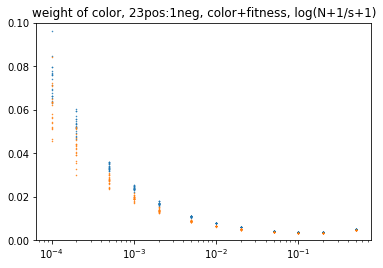

In [28]:
import matplotlib.pyplot as plt
plt.plot(xs_u, ys_u, '.', markersize=1)
plt.plot(xs_s, ys_s, '.', markersize=1)
#plt.plot([7e-5 ,0.7], [np.log(7),np.log(7)], color='grey', linewidth=0.5)
plt.xscale('log')
plt.ylim(0,.1)
plt.title('weight of color, 23pos:1neg, color+fitness, log(N+1/s+1)')

In [ ]:
filename = 'nodes=1.0e+05&er_edges=5.0e+05&choice_edges=2.0e+04&color_ratio=1.0e-02&checkpoint=1.00&time=2019-08-02T14:58:30&seed=NGMCEM.npz&extract_time=2019-08-02T23:28:35'
dat = np.load("features/{}.npz".format(filename))

In [ ]:
new_sws = dat['sws_s']

In [ ]:
sampling = 'stratified'
c = sampling[0]
for i in range(15):
  m = MNLogit(num_threads=64)
  m.data(dat['Xs_'+c][i], dat['ys_'+c][i], sws=new_sws[i])
  m.fit(max_num_iter=500, clip=1.0, clip_norm_ord=2)
  print(m.get_model_info())